In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import sys
from datetime import datetime
import numpy as np

In [2]:
def get_file_info(filename):
    file_contents = ""
    with open(filename) as f:
        for x in f:
            file_contents += x 
    return file_contents

In [3]:
def read_positions(positions):
    pos_list = positions.split("\n")
    new_positions = []
    for i in range(len(pos_list)):
        if len(pos_list[i]) > 0:
            curr = pos_list[i]
            new_arr = []
            new_arr.append(float(curr[1:curr.find(",")])) 
            new_str = curr[curr.find(",") + 1:]
            new_arr.append(float(new_str[0:new_str.find(",")]))
            new_arr.append(float(new_str[new_str.find(",") + 1:len(new_str)-1]))
            new_positions.append(new_arr)
    return np.array(new_positions)

In [4]:
def create_anim_helper(frame_skip, frame_start, folder):
    def anim_helper(frame, plt, ax):
        ax.clear()
        ax.set_xlim3d([-10, 10])
        ax.set_xlabel('X')

        ax.set_ylim3d([-10, 10])
        ax.set_ylabel('Y')

        ax.set_zlim3d([-10, 10])
        ax.set_zlabel('Z')

        ax.set_title('3D Fluid')
        print(frame * frame_skip + frame_start)
        # Provide starting angle for the view.
    #     ax.view_init(25, 10)
        ax.view_init(0, 0)
        locations = read_positions(get_file_info(folder + "/floor " + str(frame * frame_skip + frame_start) + ".txt"))

        locations = locations[idx]

        scatters = [ax.plot(locations[i][0], locations[i][1], locations[i][2], 'co') for i in range(len(locations))]
        return scatters
    return anim_helper

def create_animation(frames, fps, frame_skip=1, frame_start=0, folder='test', out_file='fluid'):
    fig = plt.figure(figsize = (10,10))
    ax = p3.Axes3D(fig)

    # Setting the axes properties

    ani = animation.FuncAnimation(fig, create_anim_helper(frame_skip, frame_start, folder), frames, fargs = [plt, ax],
                                       interval=int(1000 / (fps / frame_skip)), blit=False, repeat=True)

    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=int(fps / frame_skip), metadata=dict(artist='Me'), bitrate=-1, extra_args=['-vcodec', 'libx264'])
    ani.save('{}/{}.mp4'.format(folder, out_file), writer=writer)

    plt.show()
    

In [ ]:
idx = np.random.choice(40 ** 3, int(40 ** 2), replace=True)

time = 3
fps = 60
frame_skip = int(fps / 10)

create_animation(int(time * fps / frame_skip), fps, frame_skip=frame_skip, folder='xcode/Debug')

In [5]:
import subprocess

In [ ]:
h = '0.15'
q = '0.1'
k = '0.001'
c = '0.00075'
vort = '0.0005'
relax = '4000'
out_file = 'h{}_q{}_k{}_c{}_vort{}_relax{}'.format(h, q, k, c, vort, relax)

print(out_file)

rc = subprocess.call(['./clothsim', '--h', h, '--q', q, '--k', k, '--c', c, '--vort', vort, '--relax', relax], stdout=subprocess.DEVNULL)

if rc == 0:
    idx = np.random.choice(40 ** 3, int(40 ** 2), replace=True)

    time = 3
    fps = 60
    frame_skip = int(fps / 10)

    create_animation(int(time * fps / frame_skip), fps, frame_skip=frame_skip, folder='.', out_file=out_file)

In [10]:
def tuning(time_int=7, fps_int=60, h_list=[0.15], q_list=[0.1], k_list=[0.001], c_list=[0.00075], vort_list=[0.0005], relax_list=[4000]):
    time = str(time_int)
    fps = str(fps_int)
    for h in h_list:
        h = str(h)
        for q in q_list:
            q = str(q)
            for k in k_list:
                k = str(k)
                for c in c_list:
                    c = str(c)
                    for vort in vort_list:
                        vort = str(vort)
                        for relax in relax_list:
                            relax = str(relax)
                            out_file = 'h{}_q{}_k{}_c{}_vort{}_relax{}'.format(h, q, k, c, vort, relax)

                            print(out_file)

                            rc = subprocess.call(['./clothsim', '--h', h, '--q', q, '--k', k, '--c', c, '--vort', vort, '--relax', relax, '--time', time, '--fps', fps],
                                                 stdout=subprocess.DEVNULL)

                            if rc == 0:
                                idx = np.random.choice(40 ** 3, int(40 ** 2), replace=True)
                                frame_skip = int(fps_int / 10)
                                create_animation(int(time_int * fps_int / frame_skip), fps_int, frame_skip=frame_skip, folder='.', out_file=out_file)

h0.15_q0.1_k0.001_c0.0002_vort0.0002_relax1000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


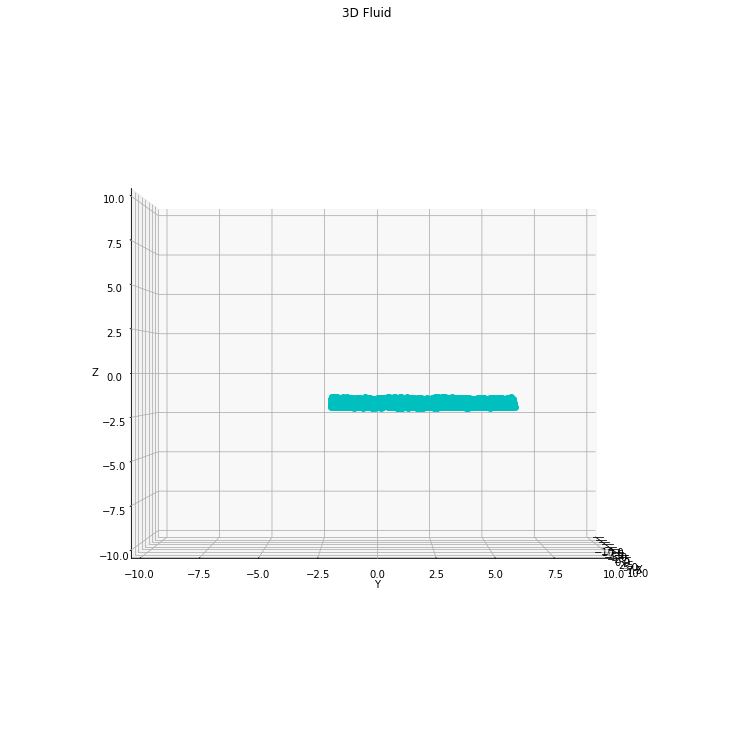

h0.15_q0.1_k0.001_c0.0002_vort0.0002_relax2000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


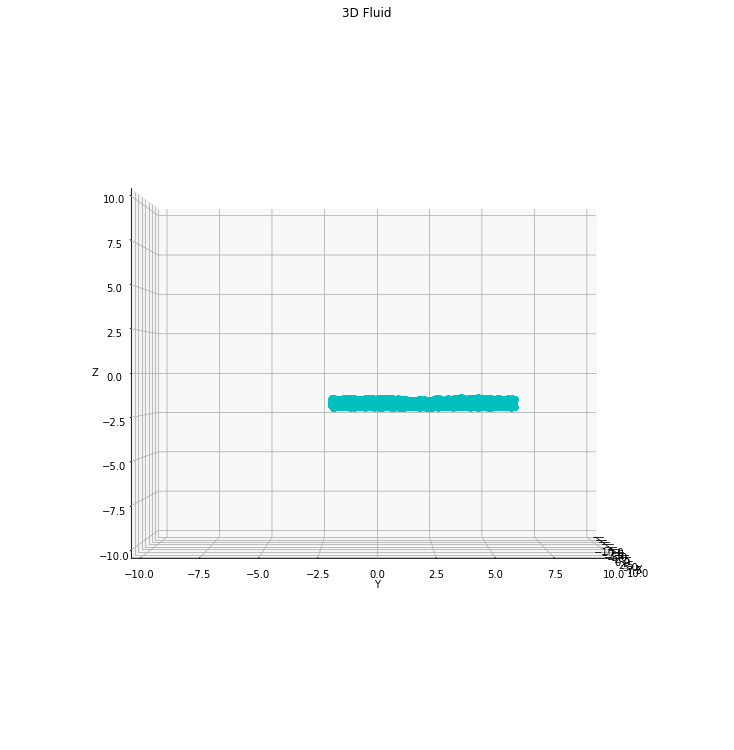

h0.15_q0.1_k0.001_c0.0002_vort0.0002_relax3000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


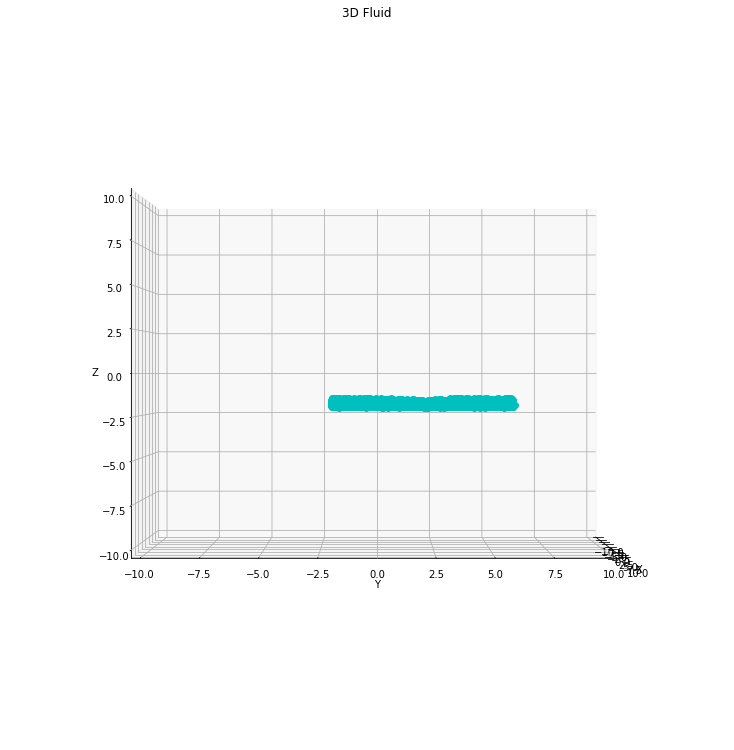

h0.15_q0.1_k0.001_c0.0002_vort0.0002_relax4000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


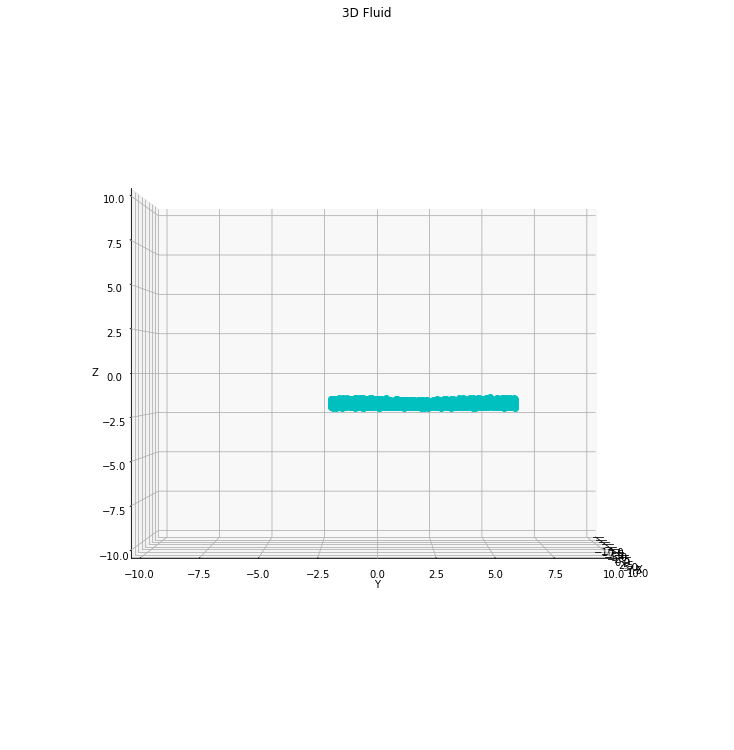

h0.15_q0.1_k0.001_c0.0002_vort0.0002_relax5000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


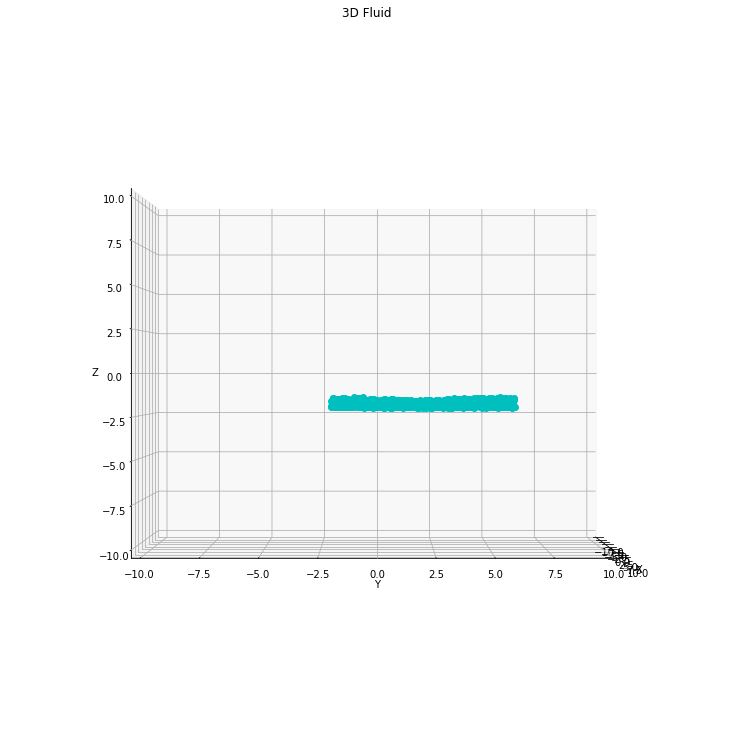

h0.15_q0.1_k0.001_c0.0002_vort0.0002_relax6000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


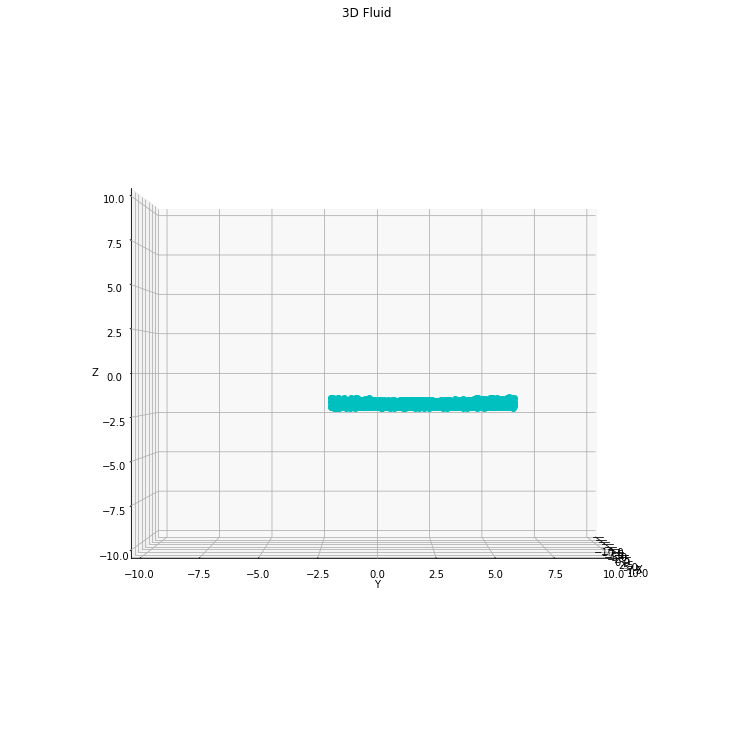

h0.15_q0.1_k0.001_c0.0002_vort0.0004_relax1000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


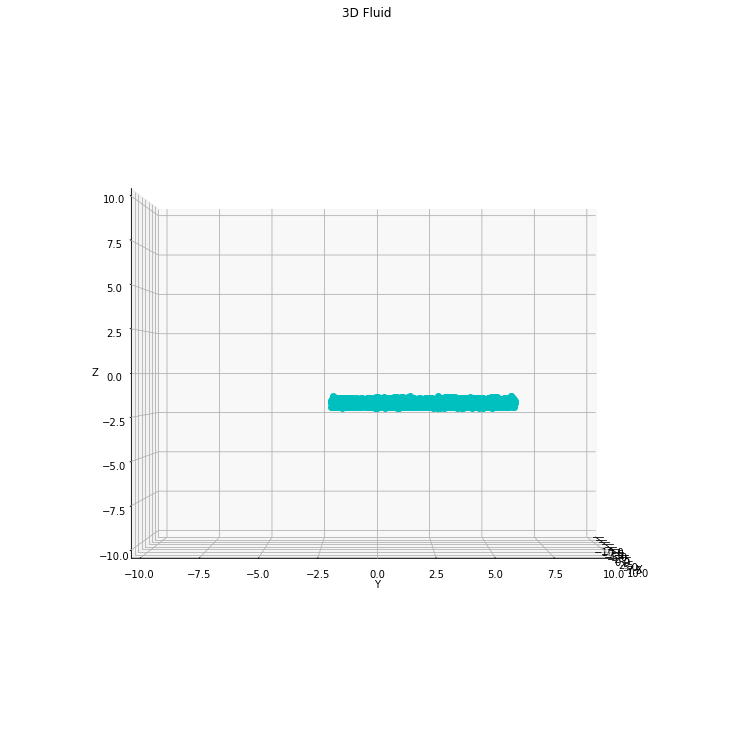

h0.15_q0.1_k0.001_c0.0002_vort0.0004_relax2000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


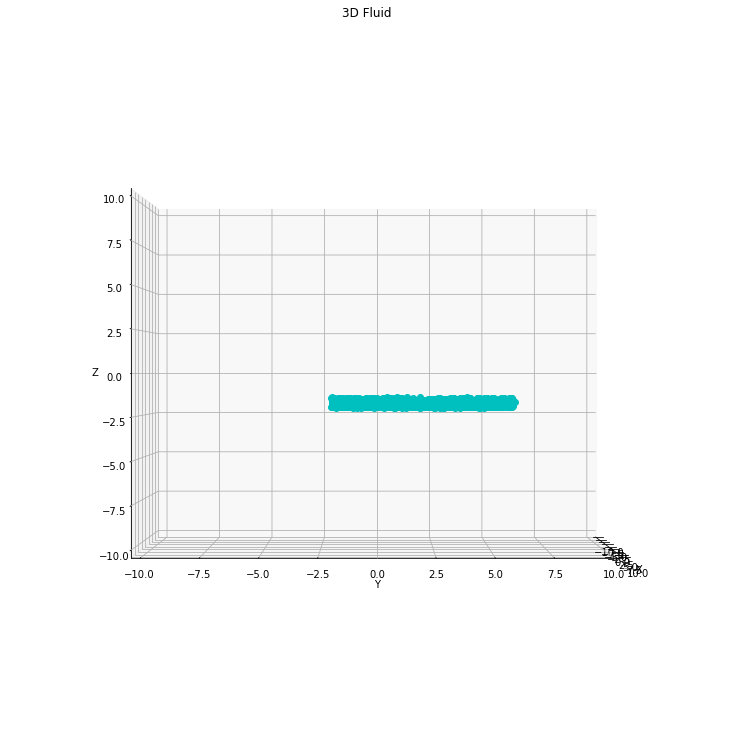

h0.15_q0.1_k0.001_c0.0002_vort0.0004_relax3000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


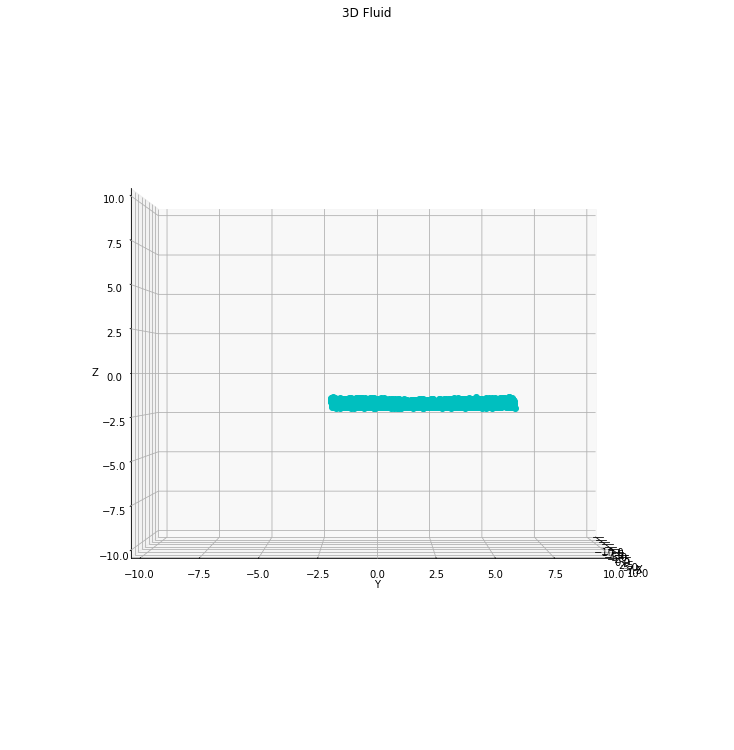

h0.15_q0.1_k0.001_c0.0002_vort0.0004_relax4000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


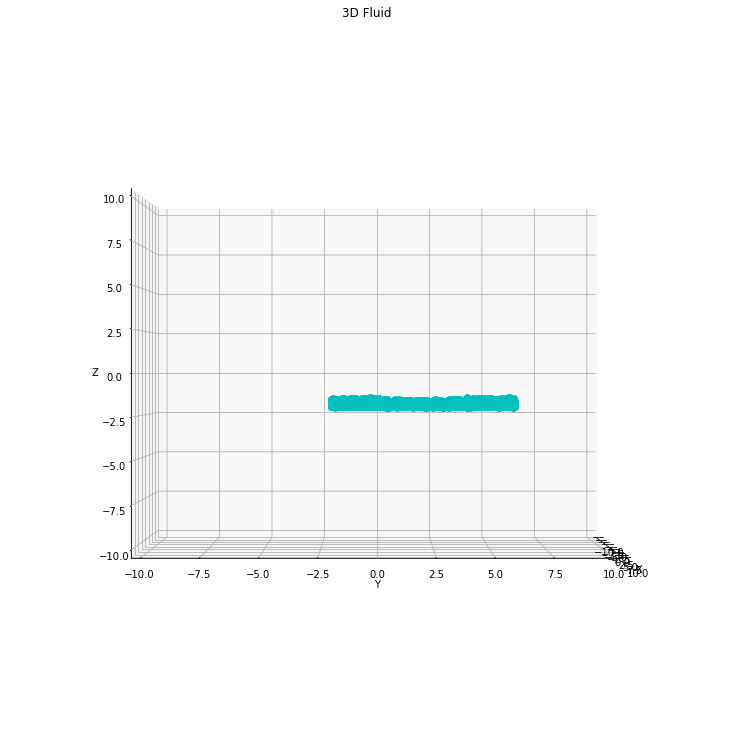

h0.15_q0.1_k0.001_c0.0002_vort0.0004_relax5000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


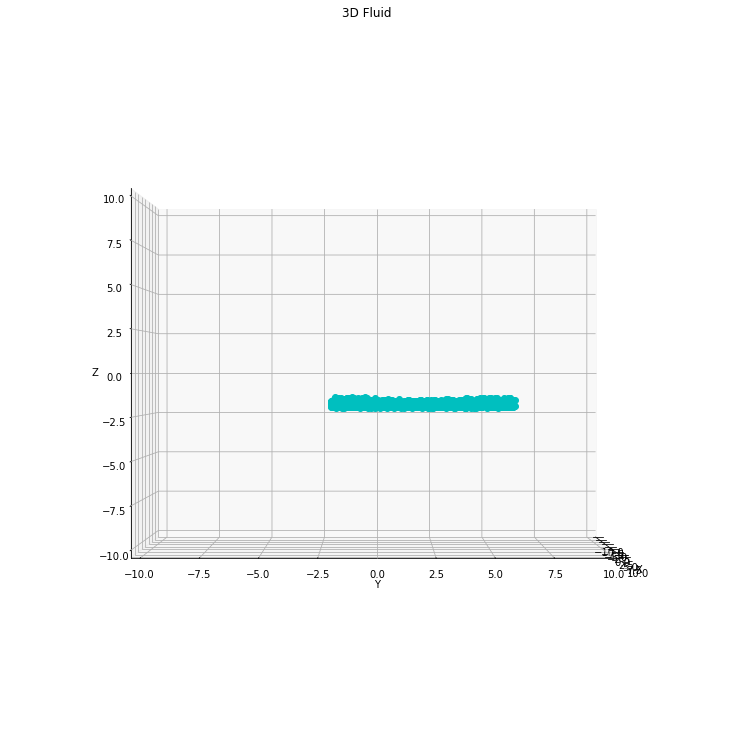

h0.15_q0.1_k0.001_c0.0002_vort0.0004_relax6000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


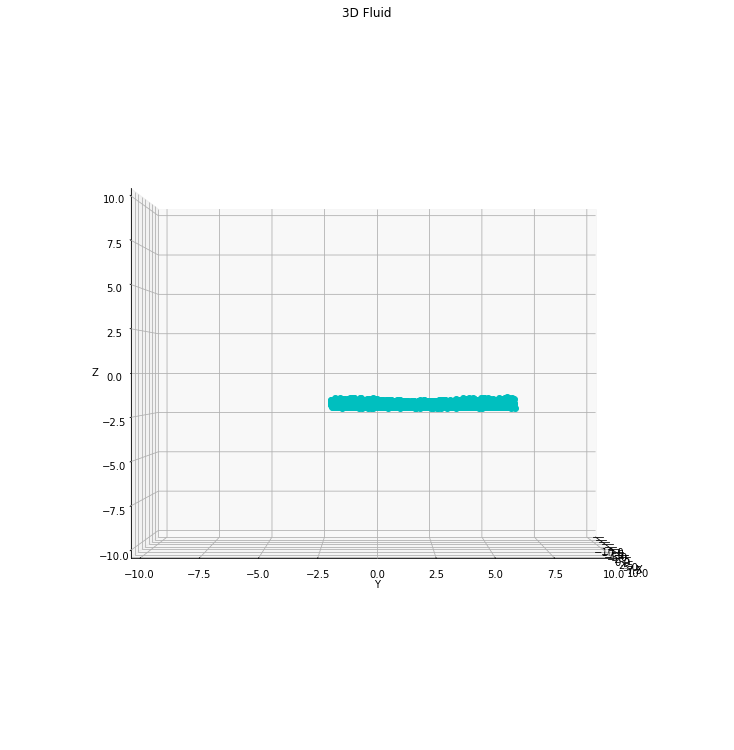

h0.15_q0.1_k0.001_c0.0002_vort0.0006_relax1000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


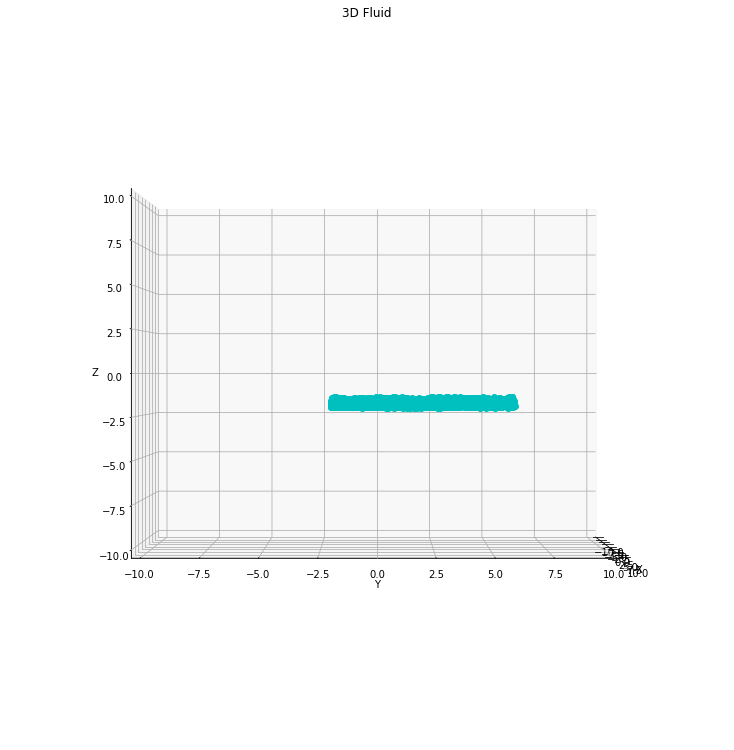

h0.15_q0.1_k0.001_c0.0002_vort0.0006_relax2000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


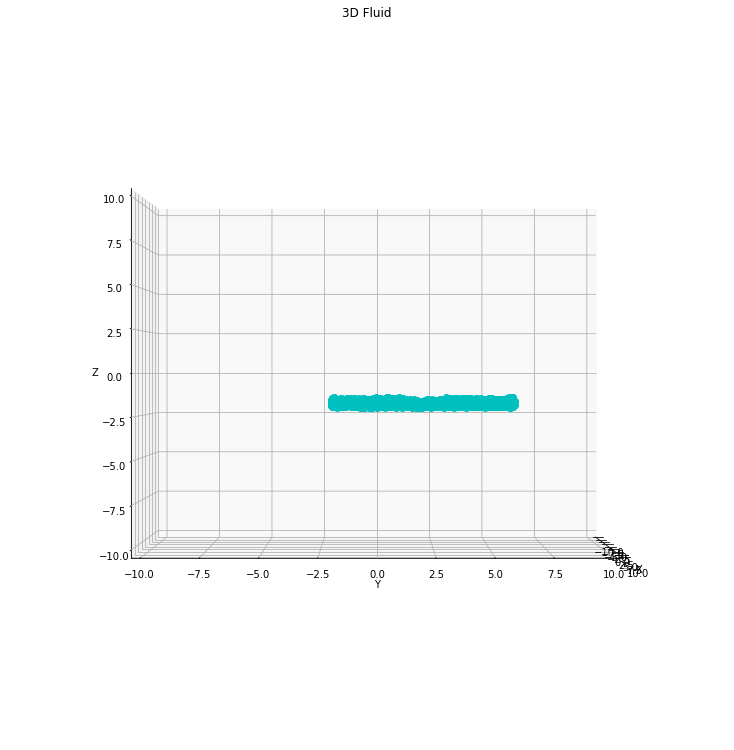

h0.15_q0.1_k0.001_c0.0002_vort0.0006_relax3000


/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_36299/1641557752.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174
180
186
192
198
204
210
216
222
228
234
240
246
252
258
264
270
276
282
288
294
300
306
312
318
324
330
336
342
348
354
360
366
372
378
384
390
396
402
408
414


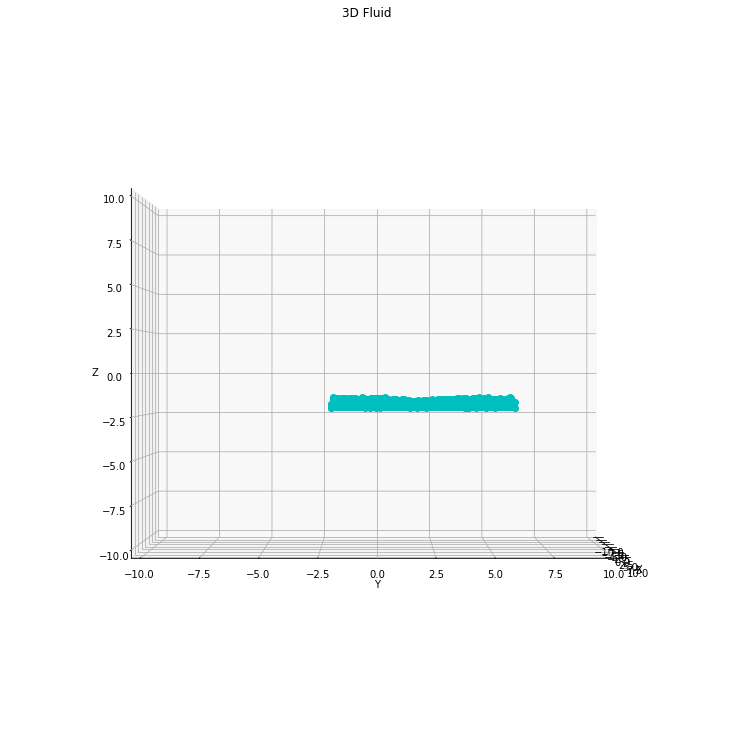

h0.15_q0.1_k0.001_c0.0002_vort0.0006_relax4000


In [ ]:
idx = np.random.choice(40 ** 3, int(40 ** 2), replace=True)

k_list = np.around(np.arange(0.001, 0.005 + 0.001, step=0.001), 3)
c_list = np.around(np.arange(0.0002, 0.001 + 0.0002, step=0.0002), 4)
vort_list = np.around(np.arange(0.0002, 0.001 + 0.0002, step=0.0002), 4)
relax_list = np.around(np.arange(1000, 6000 + 1000, step=1000), 0)

tuning(k_list=k_list, c_list=c_list, vort_list=vort_list, relax_list=relax_list)